# STAGE 1 EXPLORATORY DATA ANALYSIS - SEST CONSULT

**Data Description**
- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment: The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

## 1. IMPORT LIBRARY AND LOAD DATA

In [2]:
# Import Library
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import wrap
from matplotlib import rcParams

sns.set_style('darkgrid')
pal = sns.color_palette()

In [4]:
# Load Data
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## 2. DESCRIPTIVE STATISTICS

In [3]:
# General Information and Missing value check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


from the results above, **no value is missing**

column and each of data type **seems correct**

In [4]:
# Duplicated value check
df.duplicated().sum()

0

there is **no duplicated values**

In [5]:
# Statistical summary
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


- Berdasarkan nilai max dan min dari setiap feature, secara umum terlihat normal. Pada 'Discount_offered' dan 'Prior_purchases' perlu diperhatikan karena nilai maxnya sangat jauh dari Q3nya
- Semua feature terkecuali 'Discount_offered' dan 'Weight_in_gms' terdistribusi normal dilihat dari mean dan median yang bernilai dekat
- Feature 'Discount_offered' dan 'Weigh_in_gms' distribusinya kemungkinan skewed

## Descriptive Statistics Summary:

1. Setiap kolom dan tipe datanya sudah sesuai
2. Setiap kolom tidak memiliki nilai kosong
3. Berdasarkan dari hasil `describe` diatas, tidak ada nilai summary yang bernilai aneh

## 3. UNIVARIATE ANALYSIS

In [6]:
# Separate columns by numericals and categoricals
numericals = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
categoricals = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

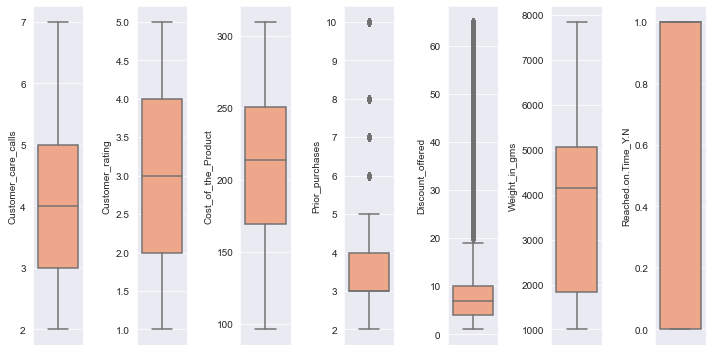

In [7]:
# Boxplot
feat_num = numericals
plt.figure(figsize=(10,5))
for i in range(0, len(feat_num)):
    plt.subplot(1, len(feat_num), i+1)
    sns.boxplot(y=df[feat_num[i]], color='lightsalmon', orient='v')
    plt.tight_layout()

- Dapat dilihat pada plot 'Discount_offered' dan 'Prior_purchases' terdapat *outlier* dan cukup jauh dari nilai distribusi normalnya
- Feature lainnya terlihat tidak memiliki *outlier*

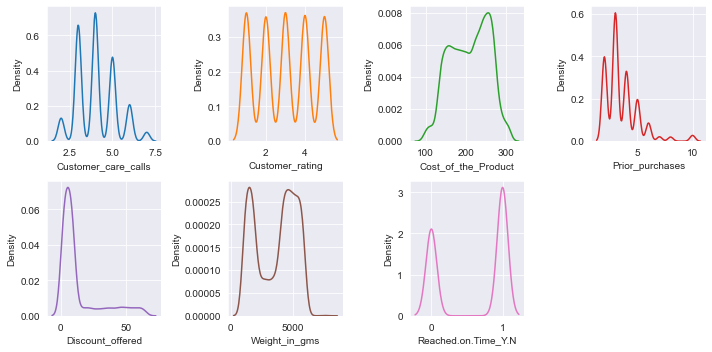

In [8]:
# Distplot
plt.figure(figsize=(10,5))
for i in range(0, len(feat_num)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[feat_num[i]], color=pal[i])
    plt.xlabel(feat_num[i])
    plt.tight_layout()

- Terdapat 2 feature yaitu 'Prior_purchase' dan 'Discount_offered' terdistribusi *negatively skewed*
- Feature 'Reached.on.Time_Y.N' memiliki distribusi *bimodal*

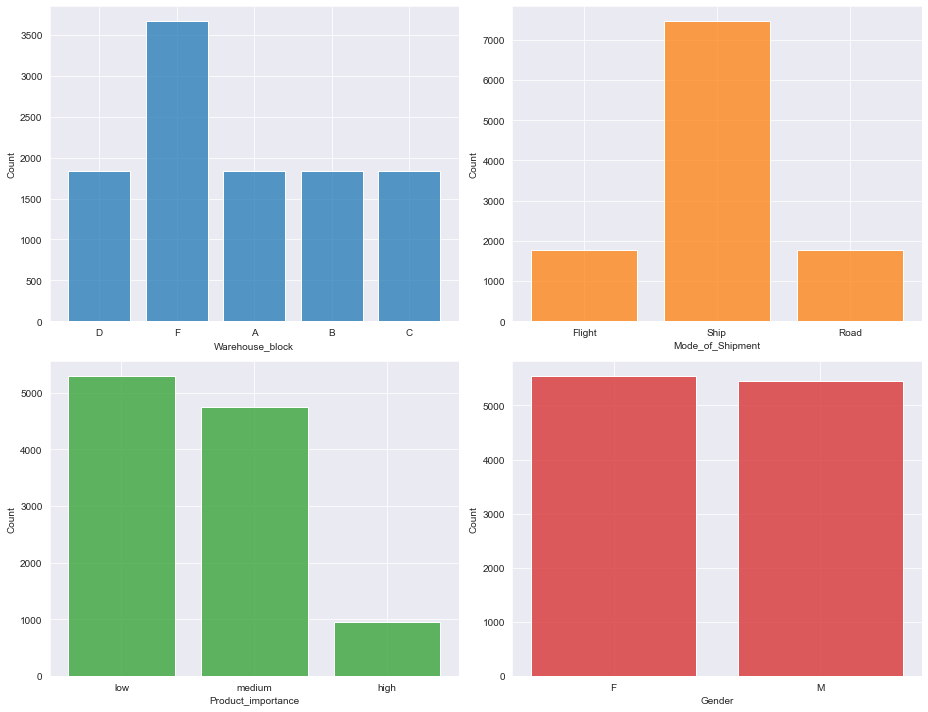

In [9]:
# Countplot
feat_cat = categoricals
plt.figure(figsize=(13,10))
for i in range(0, len(feat_cat)):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feat_cat[i]], shrink=0.8, color=pal[i])
    plt.tight_layout()

-**Warehouse**  : Block A, B, C, D memiliki nilai yang serupa sedangkan block F mendominasi hingga 2x lipat nilai block lainnya.

-**Shipment**   : Transportasi udara dan darat memiliki nilai yang serupa sedangkan transportasi laut(menggunakan kapal) mendominasi sekitar 4x lipat lebih banyak.

-**Importance** : Secara keseluruhan mayoritas *Importance* produk ada pada *low* dan *medium*, sedangkan *High importances* menjadi minoritas.

-**Genders**    : Kedua gender memiliki nilai yang serupa.

## 4. MULTIVARIATE ANALYSIS

<AxesSubplot:>

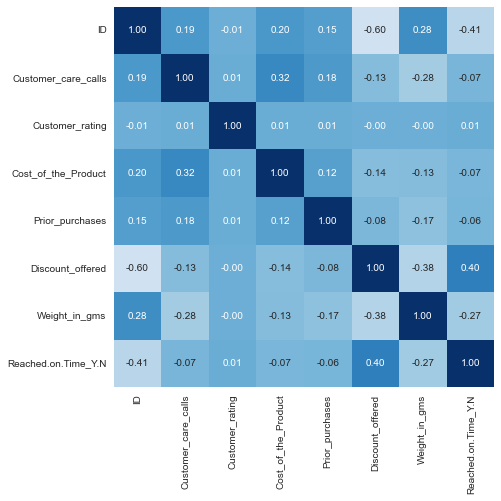

In [10]:
# Correlation for each numerical features
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, square=True, cmap='Blues', cbar=False, vmin=-1, vmax=1, fmt='.2f')

Dari hasil heatmap diatas:

- Tidak ada 2 feature yang redundan (>0.7)
- Terdapat korelasi positif antara feature 'Discount_offered' dan 'Reached.on.Time_Y.N' (0.40)
- Terdapat korelasi positif antara feature 'Customer_care_calls' dan 'Cost_of_the_Product' (0.32)
- Terdapat korelasi negatif antara feature 'Weight_in_gms' dan 'Discount_offered' (-0.38)
- Terdapat korelasi negatif antara feature 'Reached.on.Time_Y.N' dan 'Weight_in_gms' (-0.27)


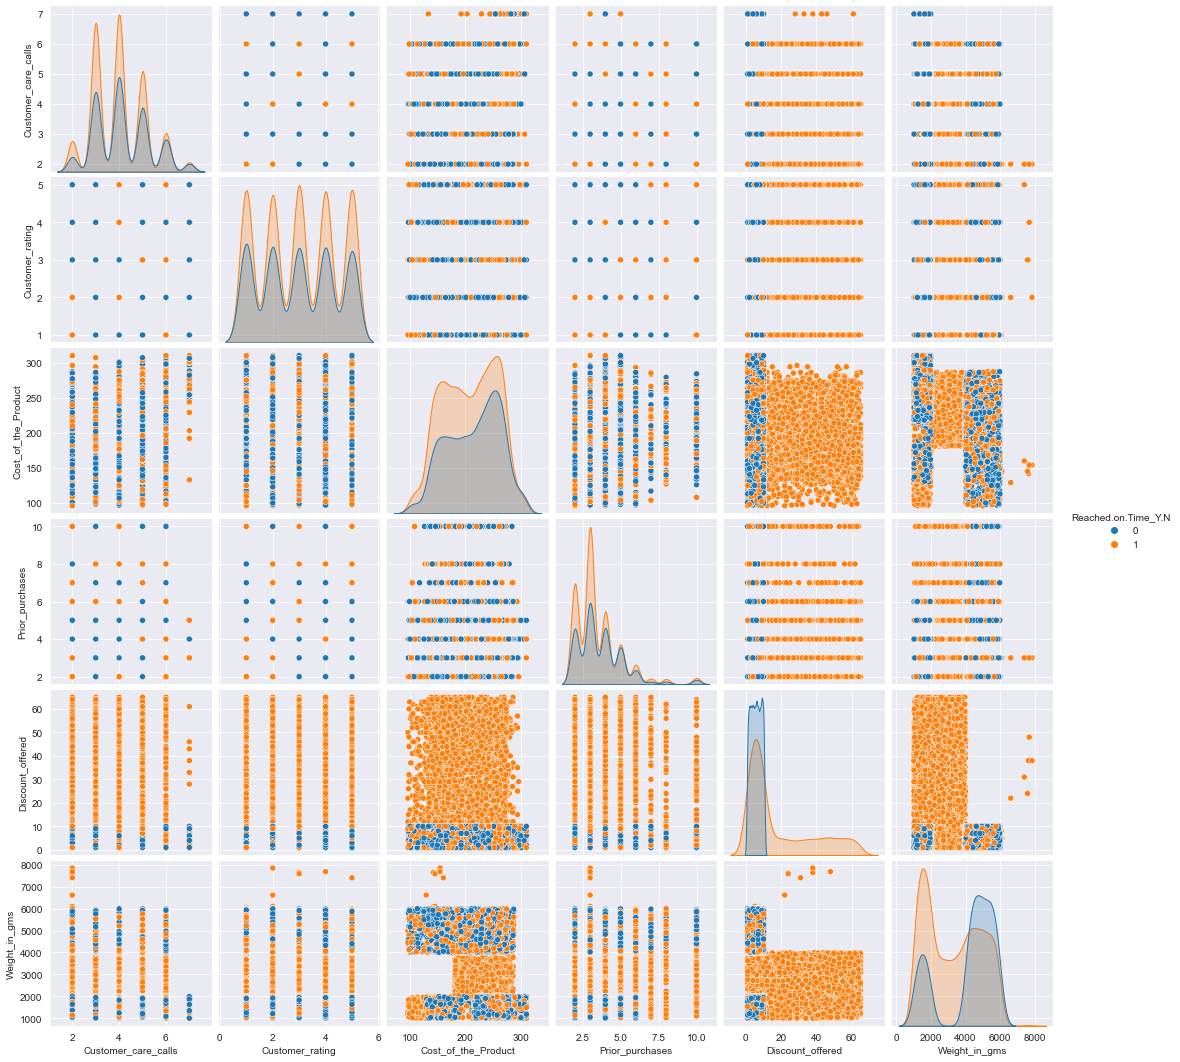

In [11]:
# Scatter plot
df = df.drop('ID', axis = 1)
sns.pairplot(df, diag_kind='kde', hue='Reached.on.Time_Y.N')

## 5. BUSINESS INSIGHT

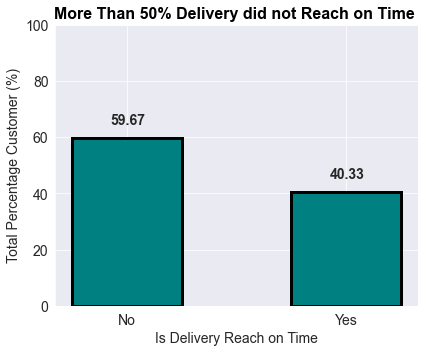

In [7]:
# Package Reached on Time Percentage

dfs = pd.read_csv('Train.csv')
dfs['Reached.on.Time_Y.N'] = dfs['Reached.on.Time_Y.N'].replace((0, 1), ('Yes', 'No'))

# Total Package Reached on Time Percentage
dfs1 = dfs.groupby(['Reached.on.Time_Y.N'])['ID'].nunique().reset_index(name='Total_Customer')
dfs1['Percentage'] = round(dfs1['Total_Customer']*100 / dfs1['Total_Customer'].sum(),2)

x = dfs1['Reached.on.Time_Y.N']
y = dfs1['Percentage']

plt.figure(figsize=(6,5))
plt.bar(x = x, height = y, data=dfs1,
        width = 0.5,
        color = 'teal',
        edgecolor = 'black',
        linewidth = 3)
plt.title('More Than 50% Delivery did not Reach on Time ', fontsize = 16, color = 'black', fontweight = 'semibold')
plt.ylabel('Total Percentage Customer (%)', fontsize = 14)
plt.xlabel('Is Delivery Reach on Time', fontsize = 14)
plt.ylim(0,100)
plt.tick_params(axis='both', which='major', labelsize=14)

reached_time = range(len(x))
for i in reached_time:
    plt.text(x = reached_time[i]-0.075, y = y[i]+5, s = round(y[i],2), fontsize=14, fontweight='semibold')

plt.tight_layout()

- Berdasarkan grafik diatas dapat dilihat bahwa secara keseluruhan **pengiriman yang datang terlambat lebih banyak** dibandingkan dengan yang tepat waktu
- Lebih dari 59% pengiriman datang terlambat

In [9]:
dfs2 = dfs.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N'])['ID'].nunique().reset_index(name='Customer')
dfs2

,Mode_of_Shipment,Reached.on.Time_Y.N,Customer
0,Flight,No,1069
1,Flight,Yes,708
2,Road,No,1035
3,Road,Yes,725
4,Ship,No,4459
5,Ship,Yes,3003


In [10]:
dfs3 = dfs.groupby(['Mode_of_Shipment'])['ID'].nunique().reset_index(name='TotalCustomer')
dfs3

,Mode_of_Shipment,TotalCustomer
0,Flight,1777
1,Road,1760
2,Ship,7462


In [11]:
dfs4 = dfs2.merge(dfs3,
                 left_on='Mode_of_Shipment',
                 right_on='Mode_of_Shipment',
                 how='inner')
dfs4['PercentageCustomer'] = round(dfs4['Customer']*100/dfs4['TotalCustomer'],2)
dfs4

,Mode_of_Shipment,Reached.on.Time_Y.N,Customer,TotalCustomer,PercentageCustomer
0,Flight,No,1069,1777,60.16
1,Flight,Yes,708,1777,39.84
2,Road,No,1035,1760,58.81
3,Road,Yes,725,1760,41.19
4,Ship,No,4459,7462,59.76
5,Ship,Yes,3003,7462,40.24


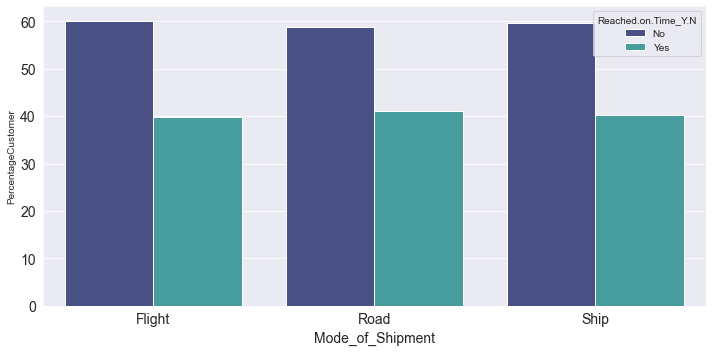

In [12]:
# Mode of Shipment towards Reached on Time Percentage

dfs2 = dfs.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N'])['ID'].nunique().reset_index(name='Customer')
dfs3 = dfs.groupby(['Mode_of_Shipment'])['ID'].nunique().reset_index(name='TotalCustomer')
dfs4 = dfs2.merge(dfs3,
                 left_on='Mode_of_Shipment',
                 right_on='Mode_of_Shipment',
                 how='inner')
dfs4['PercentageCustomer'] = round(dfs4['Customer']*100/dfs4['TotalCustomer'],2)

plt.figure(figsize = (10,5))
sns.barplot(data=dfs4, x = 'Mode_of_Shipment', y = 'PercentageCustomer', hue = 'Reached.on.Time_Y.N', palette='mako')
plt.xlabel('Mode_of_Shipment', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

- Semua mode pengiriman memiliki **jumlah pengiriman yang terlambat lebih banyak** dibandingkan dengan yang tepat waktu dengan rasio (3/2).
- Secara keseluruhan, dengan mode pengiriman terbanyak menggunakan kapal dibandingkan mode lainnya artinya pengiriman dengan kapal memiliki paling banyak keterlambatan dari segi jumlah.

In [28]:
# Product Importance towards Reached on Time Percentage

dfs_pi = dfs.groupby(['Product_importance', 'Reached.on.Time_Y.N'])['ID'].nunique().reset_index(name='Customer')
dfs_pi

,Product_importance,Reached.on.Time_Y.N,Customer
0,high,No,616
1,high,Yes,332
2,low,No,3140
3,low,Yes,2157
4,medium,No,2807
5,medium,Yes,1947


In [29]:
dfs_pi2 = dfs.groupby(['Product_importance'])['ID'].nunique().reset_index(name='TotalCustomer')
dfs_pi2

,Product_importance,TotalCustomer
0,high,948
1,low,5297
2,medium,4754


In [30]:
dfs_pif = dfs_pi.merge(dfs_pi2,
                 left_on='Product_importance',
                 right_on='Product_importance',
                 how='inner')
dfs_pif['PercentageCustomer'] = round(dfs4['Customer']*100/dfs4['TotalCustomer'],2)
dfs_pif

,Product_importance,Reached.on.Time_Y.N,Customer,TotalCustomer,PercentageCustomer
0,high,No,616,948,60.16
1,high,Yes,332,948,39.84
2,low,No,3140,5297,58.81
3,low,Yes,2157,5297,41.19
4,medium,No,2807,4754,59.76
5,medium,Yes,1947,4754,40.24


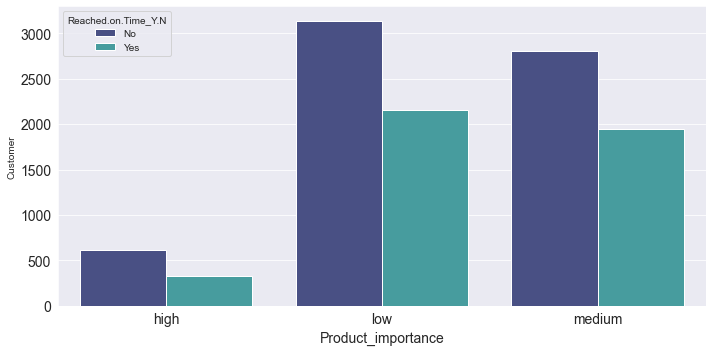

In [31]:
plt.figure(figsize = (10,5))
sns.barplot(data=dfs_pif, x = 'Product_importance', y = 'Customer', hue = 'Reached.on.Time_Y.N', palette='mako')
plt.xlabel('Product_importance', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()